In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

### Decision Boundary Plotter

In [6]:
def plot_decision_boundary(model, X, y, resolution=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

### Confusion Matrix Plotter

In [7]:
def plot_confusion_matrix(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

### Cluster Scatter Plot

In [8]:
def plot_clusters(X, labels, centroids=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    c='red', s=200, alpha=0.75, marker='X')
    plt.title("Cluster Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

### Learning Curve Plotter

In [9]:
def plot_learning_curve(train_errors, val_errors):
    epochs = range(1, len(train_errors) + 1)
    plt.plot(epochs, train_errors, 'b-', label='Training Error')
    plt.plot(epochs, val_errors, 'r--', label='Validation Error')
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

### Let's try something with these:

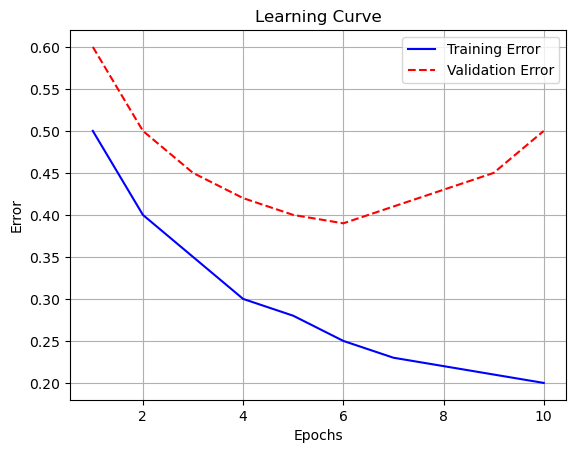

In [10]:
train_errors = [0.5, 0.4, 0.35, 0.3, 0.28, 0.25, 0.23, 0.22, 0.21, 0.2]
val_errors   = [0.6, 0.5, 0.45, 0.42, 0.4, 0.39, 0.41, 0.43, 0.45, 0.5]

plot_learning_curve(train_errors, val_errors)

### We just displayed 3 things:
#### Overfitting (val error rising while train error drops)
#### Underfitting (both high)
#### Balanced training (both low)

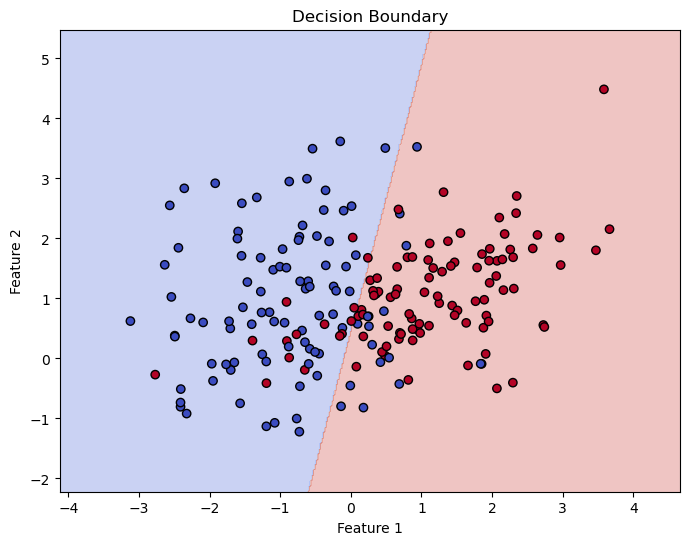

In [11]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

model = LogisticRegression().fit(X, y)
# If you're wondering: these lines above are not the algorithm codes we are aiming in this agenda.
# We utilised Scikit-learn in order to not waste time. In summary, do not worry.

plot_decision_boundary(model, X, y)